In [1]:
"""
Name: Lauren Nguyen
Course: CPSC 222
Assignment: Data Assignment 5
Date: 11/8/2022
Description: Program uses JupyterNB to play with data and matplotlib
"""
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\dzuy\\Desktop\\CPSC222\\DAs\\da_5\\utils.py'>

## Loading the data into a PD dataframe
In this step we are grabbing the data from patient_to_clean.csv and inputting it into a pandas dataframe.


**Attributes**
* ID: Index of the dataset. Counting numbers starting at 0.
* Gender: Gender of the patient, "M" for male and "F" for female.
* Age: Age of the patient in years
* Marital Status: Description of the patient's marital status. No coding system enforced.
* RIC: RIC of the patient assigned according to Appendix B in the Centers for Medicaid and Medicare Services IRF-PAI training manual.
* Admission Total FIM Score: The admission total Functional Independence Measure (FIM) score of the patient.
* Discharge Total FIM Score: The discharge total FIM score of the patient.

In [2]:
df = utils.load_into_df("patient_data_to_clean.csv")
# print(df)

## Cleaning the data

In this step we are cleaning the marriage status column into these categories: **"Never married", "Divorced", "Married", "Widowed", "Separated"**. 

**We are also decoding the RIC integer to see why the patient is in the hospital**
1. "Stroke"
1. "TBI" (Traumatic brain injury)
1. "NTBI" (Non-traumatic brain injury)
1. "TSCI" (Traumatic spinal cord injury)
1. "NTSCI" (Non-traumatic spinal cord injury)
1. "Neuro" (Neurologic conditions)
1. "FracLE" (Fracture, lower extremity)
1. "ReplLE" (Joint replacement, lower extremity)
1. "Ortho" (Other orthopaedic)
1. "AMPLE" (Amputation, lower extremity)
1. "AMP-NLE"(Amputation, upper extremity or other)
1. "OsteoA" (Osteoarthritis)
1. "RheumA" (Rheumatoid arthritis)
1. "Cardiac" (Cardiac disorders)
1. "Pulmonary" (Pulmonary disorders)
1. "Pain" (Pain syndromes)
1. "MMT-NBSCI" (Major multiple trauma, non brain injury or spinal cord injury)
1. "MMT-BSCI" (Major multiple trauma, brain injury or spinal cord injury)
1. "GB": (Guillain-Barre Syndrome)
1. "Misc" (Miscellaneous)
1. "Burns"


In [3]:
clean_df = utils.clean_data(df)
clean_df.to_csv("patient_data_cleaned.csv")

## Aggregate the Data
Next we will use our dataframe to compute some statistics. Then we will put this information into a Series!


**It will output:**
* the total number of patients
* the total number of males
* the total number of females
* the RIC label for the most commonly occuring RIC
* the total number of patients with the most commonly occuring RIC
* average age for stroke patients
* standard deviation for age of stroke patients
* average age for male stroke patients
* standard deviation for male stroke patients
* average age for female stroke patients
* standard deviation of age for female stroke patients

**Some Formulas we will be using are:**

Average: $\frac{1}{n} \sum_{i=i}^{n} x_{i}$  
Standard Deviation: $\sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$  
Mode: l + h($\frac{f_{m}-f_{l}}{2f_{m}-f_{l}-f_{2}}$)


In [4]:
statistics_list = []
statistics_headers = ["Total Number of patients", "Total number of males", "Total number of females", "Total number of Married Patients", "Most common occuring RIC"
                        , "Total Number of patients with most common RIC", "Average stroke patient age", "Stdev of stroke patients age", "Average age for male stroke patients"
                        ,"Stdev for male stroke patients", "Average age for female stroke patients", "Stdev of age for female stroke patients"]
statistics_list = utils.aggregate_data(clean_df)
stats_series = pd.Series(statistics_list, index= statistics_headers)
print(stats_series)

Total Number of patients                              4555
Total number of males                                 2242
Total number of females                               2313
Total number of Married Patients                      2262
Most common occuring RIC                            Stroke
Total Number of patients with most common RIC         1169
Average stroke patient age                       71.474678
Stdev of stroke patients age                     14.017111
Average age for male stroke patients             70.331126
Stdev for male stroke patients                   13.396726
Average age for female stroke patients           72.705882
Stdev of age for female stroke patients          14.566613
dtype: object


## Visualizing the Data
Now, we visualize the data in the forms of histograms and scatterplots! In these graphs, we are plotting each RIC when there is enough data present. The thresh hold for plotting the RIC is at least **100 patients**. The histograms are plotting the distributions of patients ages across different RICs. The scatterplots are plotting the discharge and admission FIM scores of males/females in the different RICs.

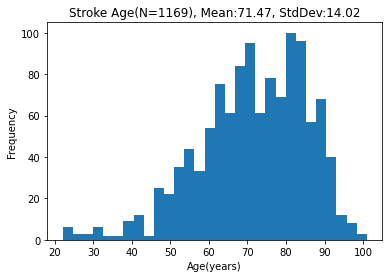

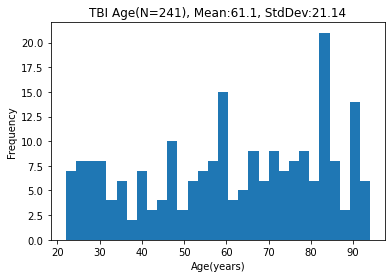

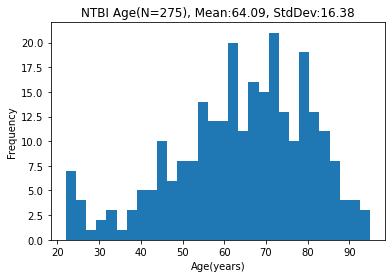

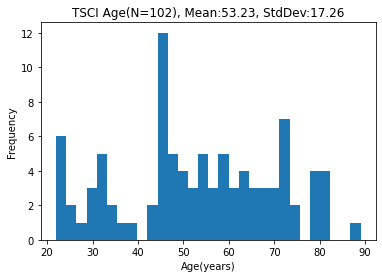

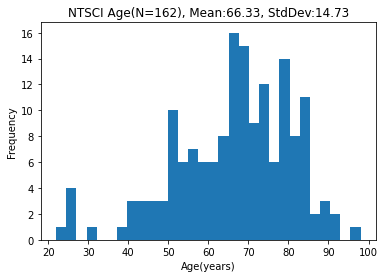

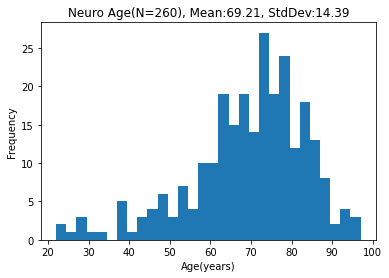

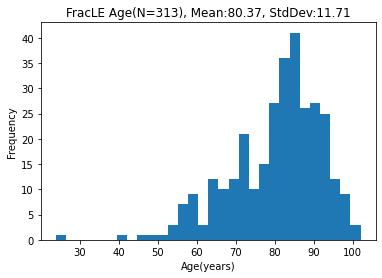

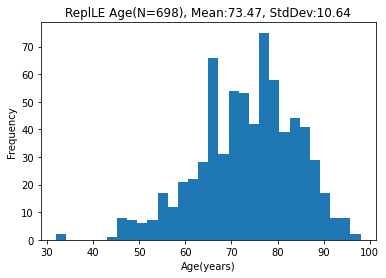

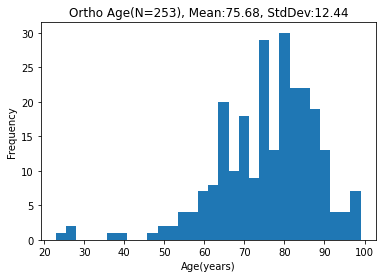

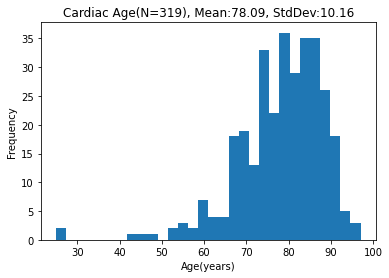

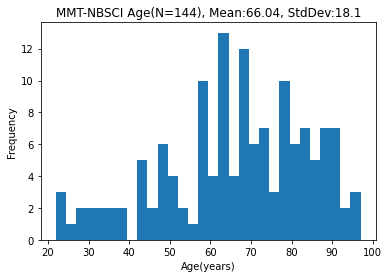

In [5]:
# PLOTTING THE HISTOGRAMS
stroke_df = clean_df.loc[clean_df["RIC"] == "Stroke"]
utils.visualized_hist_data(stroke_df, "Stroke")

my_TBI_df = clean_df.loc[clean_df["RIC"] == "TBI"]
utils.visualized_hist_data(my_TBI_df, "TBI")

my_NTBI_df = clean_df.loc[clean_df["RIC"] == "NTBI"]
utils.visualized_hist_data(my_NTBI_df, "NTBI")

my_TSCI_df = clean_df.loc[clean_df["RIC"] == "TSCI"]
utils.visualized_hist_data(my_TSCI_df, "TSCI")

my_NTSCI_df = clean_df.loc[clean_df["RIC"] == "NTSCI"]
utils.visualized_hist_data(my_NTSCI_df, "NTSCI")

Neuro_df = clean_df.loc[clean_df["RIC"] == "Neuro"]
utils.visualized_hist_data(Neuro_df, "Neuro")

FracLE_df = clean_df.loc[clean_df["RIC"] == "FracLE"]
utils.visualized_hist_data(FracLE_df, "FracLE")

Rep1LE_df = clean_df.loc[clean_df["RIC"] == "ReplLE"]
utils.visualized_hist_data(Rep1LE_df, "ReplLE")

ortho_df = clean_df.loc[clean_df["RIC"] == "Ortho"]
utils.visualized_hist_data(ortho_df, "Ortho")

cardiac_df = clean_df.loc[clean_df["RIC"] == "Cardiac"]
utils.visualized_hist_data(cardiac_df, "Cardiac")

mmt_nbsci_df = clean_df.loc[clean_df["RIC"] == "MMT-NBSCI"]
utils.visualized_hist_data(mmt_nbsci_df, "MMT-NBSCI")


### Observations in the Histograms
* Cardiac disorders, Non-traumatic spinal cord injuries, Neurologic conditions, Fractures in lower extremitys, Joint replacement in the lower extremitys, and Other orthopaedic all were distributed on the older side of the graphs
* Traumatic brain injuries, Non-traumatic brain injuries, Traumatic spinal cord injurys, and major multiple trauma were skewed more to the younger end of the distributions

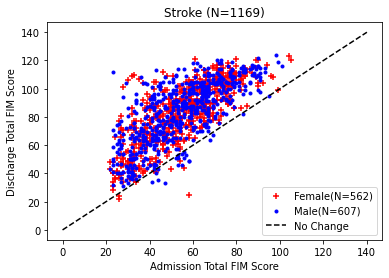

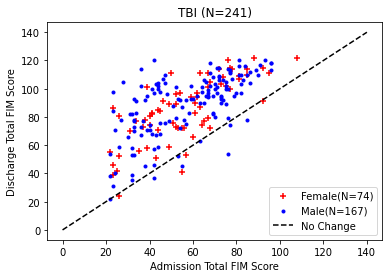

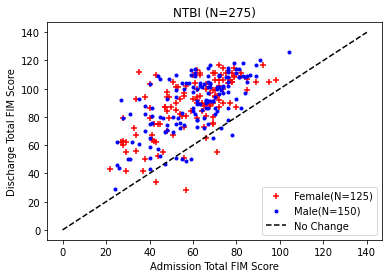

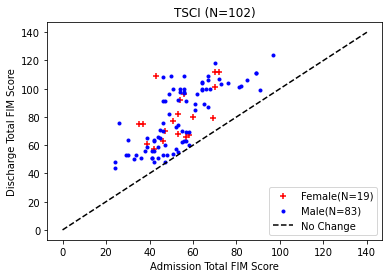

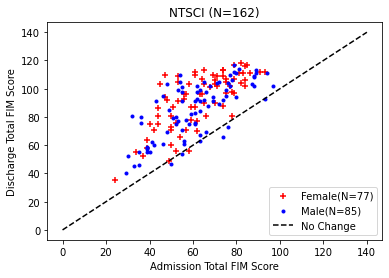

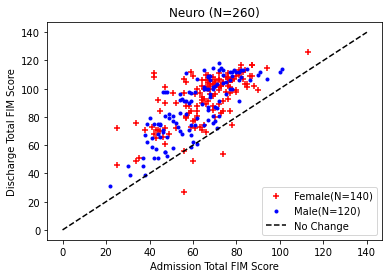

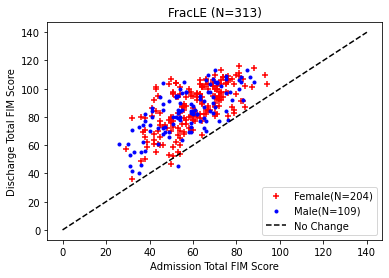

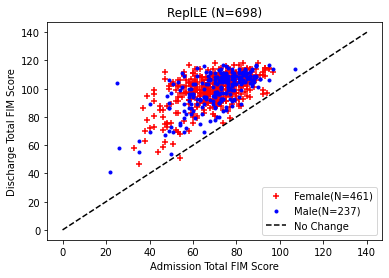

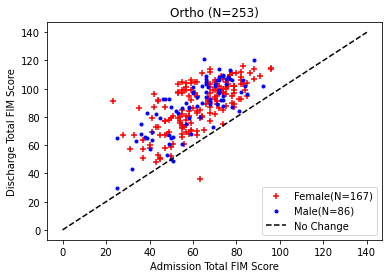

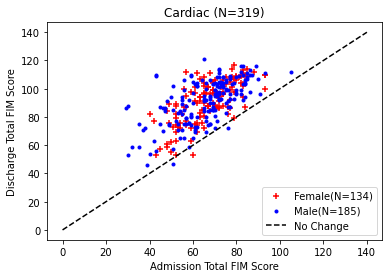

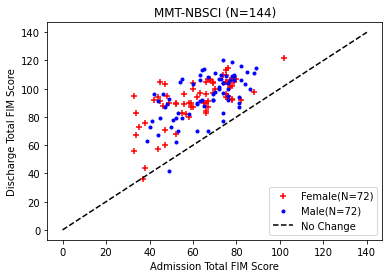

In [6]:

# PLOTTING THE SCATTERPLOTS

stroke_df = clean_df.loc[clean_df["RIC"] == "Stroke"]
utils.visualized_scatter_data(stroke_df, "Stroke")

my_TBI_df = clean_df.loc[clean_df["RIC"] == "TBI"]
utils.visualized_scatter_data(my_TBI_df, "TBI")

my_NTBI_df = clean_df.loc[clean_df["RIC"] == "NTBI"]
utils.visualized_scatter_data(my_NTBI_df, "NTBI")

my_TSCI_df = clean_df.loc[clean_df["RIC"] == "TSCI"]
utils.visualized_scatter_data(my_TSCI_df, "TSCI")

my_NTSCI_df = clean_df.loc[clean_df["RIC"] == "NTSCI"]
utils.visualized_scatter_data(my_NTSCI_df, "NTSCI")

Neuro_df = clean_df.loc[clean_df["RIC"] == "Neuro"]
utils.visualized_scatter_data(Neuro_df, "Neuro")

FracLE_df = clean_df.loc[clean_df["RIC"] == "FracLE"]
utils.visualized_scatter_data(FracLE_df, "FracLE")

Rep1LE_df = clean_df.loc[clean_df["RIC"] == "ReplLE"]
utils.visualized_scatter_data(Rep1LE_df, "ReplLE")

ortho_df = clean_df.loc[clean_df["RIC"] == "Ortho"]
utils.visualized_scatter_data(ortho_df, "Ortho")

cardiac_df = clean_df.loc[clean_df["RIC"] == "Cardiac"]
utils.visualized_scatter_data(cardiac_df, "Cardiac")

mmt_nbsci_df = clean_df.loc[clean_df["RIC"] == "MMT-NBSCI"]
utils.visualized_scatter_data(mmt_nbsci_df, "MMT-NBSCI")

## Scatterplot Observations
* the stroke scatterplot was the most populated graph
* none of the graphs dip below a 20 admission/discharge FIM score
* Joint replacement patients were especially dense in the 60-100 discharge/admission FIM score